In [1]:
#move to requirements.txt
import pandas as pd
import numpy as np
import qgrid
import re
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='stannida', api_key='tTDV8Tk5xqORM8dE27b8')

In [2]:
df=pd.read_csv('people.csv')

def calculate_words(line):
    bio =''.join(str(line))
    if 'nan' in bio:
        return 0
    else:
        return(len(re.findall(r'\w+', bio)))

df['N of Words'] = np.nan
for index, row in df.iterrows():
    df.at[index, 'N of Words'] = calculate_words(row['Bio'])
df=df[['Name', 'Age', 'Bio', 'N of Words', 'Distance(from Koblenz)', 'school', 'job',
       'number of photos', 'instagram', 'spotify']]
qgrid.show_grid(df)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [3]:
#import gini

def gini_coeff(x):
    # requires all values in x to be zero or positive numbers,
    # otherwise results are undefined
    n = len(x)
    s = x.sum()
    r = np.argsort(np.argsort(-x)) # calculates zero-based ranks
    return 1 - (2.0 * (r*x).sum() + s)/(n*s)

a=df.loc[1:60,["N of Words"]].values
b=df.loc[61:120,["N of Words"]].values
print("Gini coefficient for N of photos: ", gini_coeff(df["number of photos"]),"\nGini coefficient for N of words: ",
      gini_coeff(df["N of Words"]))
print("Percentage of empty Bio: ", (df["Bio"].isnull().sum()/df["Bio"].count())*100) 
#print(df['number of photos'][1].value_counts())

Gini coefficient for N of photos:  0.2980038022813688 
Gini coefficient for N of words:  0.7054849547180835
Percentage of empty Bio:  79.1044776119403


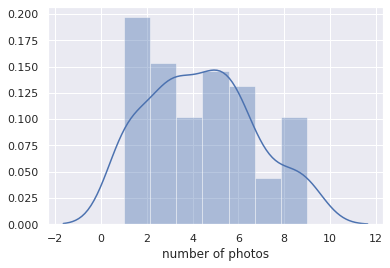

In [10]:
import seaborn as sns
sns.set(color_codes=True)
sns.distplot(df['number of photos'])

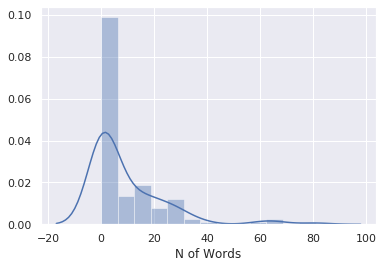

In [11]:
sns.distplot(df['N of Words'])

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
df["Bio"] = df["Bio"].replace(np.nan, '', regex=True)
count_vectorizer = CountVectorizer(stop_words='english')
count_vectorizer = CountVectorizer()
sparse_matrix = count_vectorizer.fit_transform(df['Bio'])
doc_term_matrix = sparse_matrix.todense()
df_bio = pd.DataFrame(doc_term_matrix, columns = count_vectorizer.get_feature_names())
#df_bio
from sklearn.metrics.pairwise import cosine_similarity
print(cosine_similarity(df_bio, df_bio))

[[1.         0.         0.         ... 0.         0.19364917 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.19364917 0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [29]:
male.shape[0]

59

In [34]:
from scipy import stats
female = df.loc[1:59, ['N of Words','number of photos']]
male = df.loc[60:118, ['N of Words','number of photos']]
N = male.shape[0]
var_f = female['N of Words'].var(ddof=1)
var_m = male['N of Words'].var(ddof=1)
s = np.sqrt((var_f + var_m)/2)
t = (female['N of Words'].mean() - male['N of Words'].mean())/(s*np.sqrt(2/N))
degf = 2*N - 2
p = 1 - stats.t.cdf(abs(t),df=degf)
print("t = " + str(t))
print("p = " + str(2*p))

t = -0.9320889678920984
p = 0.3532264897720352


In [35]:
var_f = female['number of photos'].var(ddof=1)
var_m = male['number of photos'].var(ddof=1)
s = np.sqrt((var_f + var_m)/2)
t = (female['number of photos'].mean() - male['number of photos'].mean())/(s*np.sqrt(2/N))
degf = 2*N - 2
p = 1 - stats.t.cdf(abs(t),df=degf)
print("t = " + str(t))
print("p = " + str(2*p))

t = -0.5146193031031153
p = 0.6077982076636306
